In [4]:
import pandas as pd

# Load the dataset
file_path = 'D:/Studies/BDAT/Semester 2/Social Data Mining/Final/Dataset/resorts.csv'
resorts_df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows and basic info of the dataset
resorts_df_info = resorts_df.info()
resorts_df_head = resorts_df.head()

resorts_df_info, resorts_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   499 non-null    int64  
 1   Resort               499 non-null    object 
 2   Latitude             499 non-null    float64
 3   Longitude            499 non-null    float64
 4   Country              499 non-null    object 
 5   Continent            499 non-null    object 
 6   Price                499 non-null    int64  
 7   Season               499 non-null    object 
 8   Highest point        499 non-null    int64  
 9   Lowest point         499 non-null    int64  
 10  Beginner slopes      499 non-null    int64  
 11  Intermediate slopes  499 non-null    int64  
 12  Difficult slopes     499 non-null    int64  
 13  Total slopes         499 non-null    int64  
 14  Longest run          499 non-null    int64  
 15  Snow cannons         499 non-null    int

(None,
    ID                        Resort   Latitude   Longitude  Country  \
 0   1                      Hemsedal  60.928244    8.383487   Norway   
 1   2              Geilosiden Geilo  60.534526    8.206372   Norway   
 2   3                          Golm  47.057810    9.828167  Austria   
 3   4  Red Mountain Resort-Rossland  49.105520 -117.846280   Canada   
 4   5                       Hafjell  61.230369   10.529014   Norway   
 
        Continent  Price            Season  Highest point  Lowest point  ...  \
 0         Europe     46    November - May           1450           620  ...   
 1         Europe     44  November - April           1178           800  ...   
 2         Europe     48  December - April           2110           650  ...   
 3  North America     60  December - April           2075          1185  ...   
 4         Europe     45  November - April           1030           195  ...   
 
    Snow cannons  Surface lifts  Chair lifts  Gondola lifts  Total lifts  \
 

In [5]:
# Display the first few rows and basic info of the dataset
resorts_df_info = resorts_df.info()
resorts_df_head = resorts_df.head()

resorts_df_info, resorts_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   499 non-null    int64  
 1   Resort               499 non-null    object 
 2   Latitude             499 non-null    float64
 3   Longitude            499 non-null    float64
 4   Country              499 non-null    object 
 5   Continent            499 non-null    object 
 6   Price                499 non-null    int64  
 7   Season               499 non-null    object 
 8   Highest point        499 non-null    int64  
 9   Lowest point         499 non-null    int64  
 10  Beginner slopes      499 non-null    int64  
 11  Intermediate slopes  499 non-null    int64  
 12  Difficult slopes     499 non-null    int64  
 13  Total slopes         499 non-null    int64  
 14  Longest run          499 non-null    int64  
 15  Snow cannons         499 non-null    int

(None,
    ID                        Resort   Latitude   Longitude  Country  \
 0   1                      Hemsedal  60.928244    8.383487   Norway   
 1   2              Geilosiden Geilo  60.534526    8.206372   Norway   
 2   3                          Golm  47.057810    9.828167  Austria   
 3   4  Red Mountain Resort-Rossland  49.105520 -117.846280   Canada   
 4   5                       Hafjell  61.230369   10.529014   Norway   
 
        Continent  Price            Season  Highest point  Lowest point  ...  \
 0         Europe     46    November - May           1450           620  ...   
 1         Europe     44  November - April           1178           800  ...   
 2         Europe     48  December - April           2110           650  ...   
 3  North America     60  December - April           2075          1185  ...   
 4         Europe     45  November - April           1030           195  ...   
 
    Snow cannons  Surface lifts  Chair lifts  Gondola lifts  Total lifts  \
 

In [6]:
# Check for missing values
missing_values = resorts_df.isnull().sum()

# Check for duplicate rows
duplicate_rows = resorts_df.duplicated().sum()

# Summary of missing values and duplicates
missing_values, duplicate_rows


(ID                     0
 Resort                 0
 Latitude               0
 Longitude              0
 Country                0
 Continent              0
 Price                  0
 Season                 0
 Highest point          0
 Lowest point           0
 Beginner slopes        0
 Intermediate slopes    0
 Difficult slopes       0
 Total slopes           0
 Longest run            0
 Snow cannons           0
 Surface lifts          0
 Chair lifts            0
 Gondola lifts          0
 Total lifts            0
 Lift capacity          0
 Child friendly         0
 Snowparks              0
 Nightskiing            0
 Summer skiing          0
 dtype: int64,
 0)

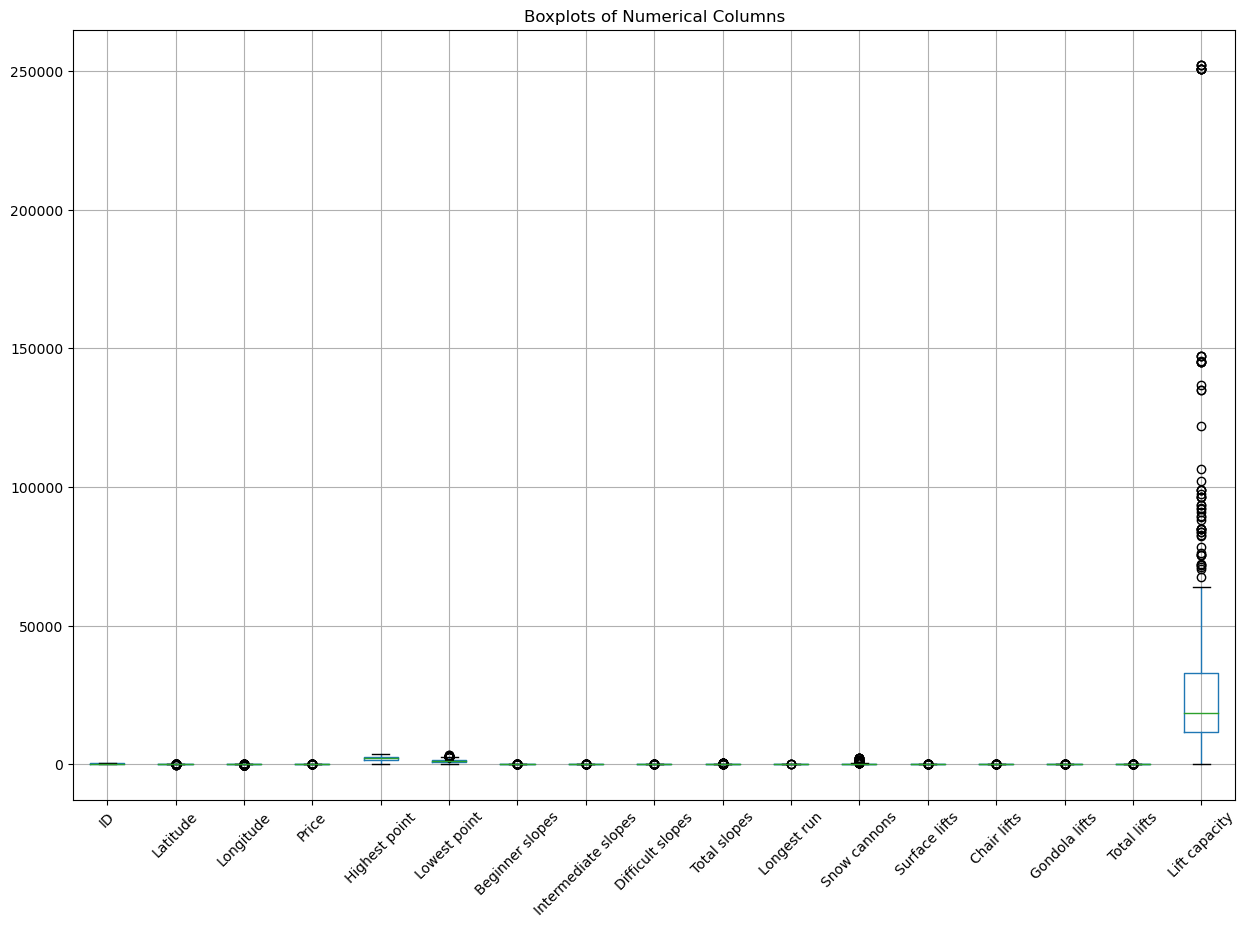

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots to check for outliers in numerical columns
numerical_columns = resorts_df.select_dtypes(include=['int64', 'float64']).columns

# Plotting the boxplots for numerical columns to check for outliers
plt.figure(figsize=(15, 10))
resorts_df[numerical_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplots of Numerical Columns')
plt.show()


In [8]:
# Addressing outliers using IQR (Interquartile Range) method for 'Lift capacity'
Q1 = resorts_df['Lift capacity'].quantile(0.25)
Q3 = resorts_df['Lift capacity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the outliers
outliers = resorts_df[(resorts_df['Lift capacity'] < lower_bound) | (resorts_df['Lift capacity'] > upper_bound)]

# Number of outliers and first few rows of outliers
num_outliers = outliers.shape[0]
outliers_head = outliers.head()

num_outliers, outliers_head


(57,
     ID                                             Resort   Latitude  \
 14  15                               Zermatt - Matterhorn  45.963009   
 16  17                                        Val Gardena  46.576643   
 18  19                    Les Gets (Les Portes du Soleil)  46.155098   
 26  27                                          Park City  40.646092   
 33  34  Madonna di Campiglio-?Pinzolo-?Folga?rida-?Mar...  46.226994   
 
      Longitude        Country      Continent  Price            Season  \
 14    7.715412    Switzerland         Europe     81        Year-round   
 16   11.644422          Italy         Europe     54  December - April   
 18    6.663331         France         Europe     51  December - April   
 26 -111.497996  United States  North America     97  November - April   
 33   10.827016          Italy         Europe     50  November - April   
 
     Highest point  Lowest point  ...  Snow cannons  Surface lifts  \
 14           3899          1562  ...  

In [9]:
# Replace the outliers in the 'Lift capacity' column with the upper and lower bounds
resorts_df['Lift capacity'] = resorts_df['Lift capacity'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x)
)

# Verify the changes by checking for any remaining outliers
remaining_outliers = resorts_df[(resorts_df['Lift capacity'] < lower_bound) | (resorts_df['Lift capacity'] > upper_bound)]

remaining_outliers_count = remaining_outliers.shape[0]
remaining_outliers_count


0

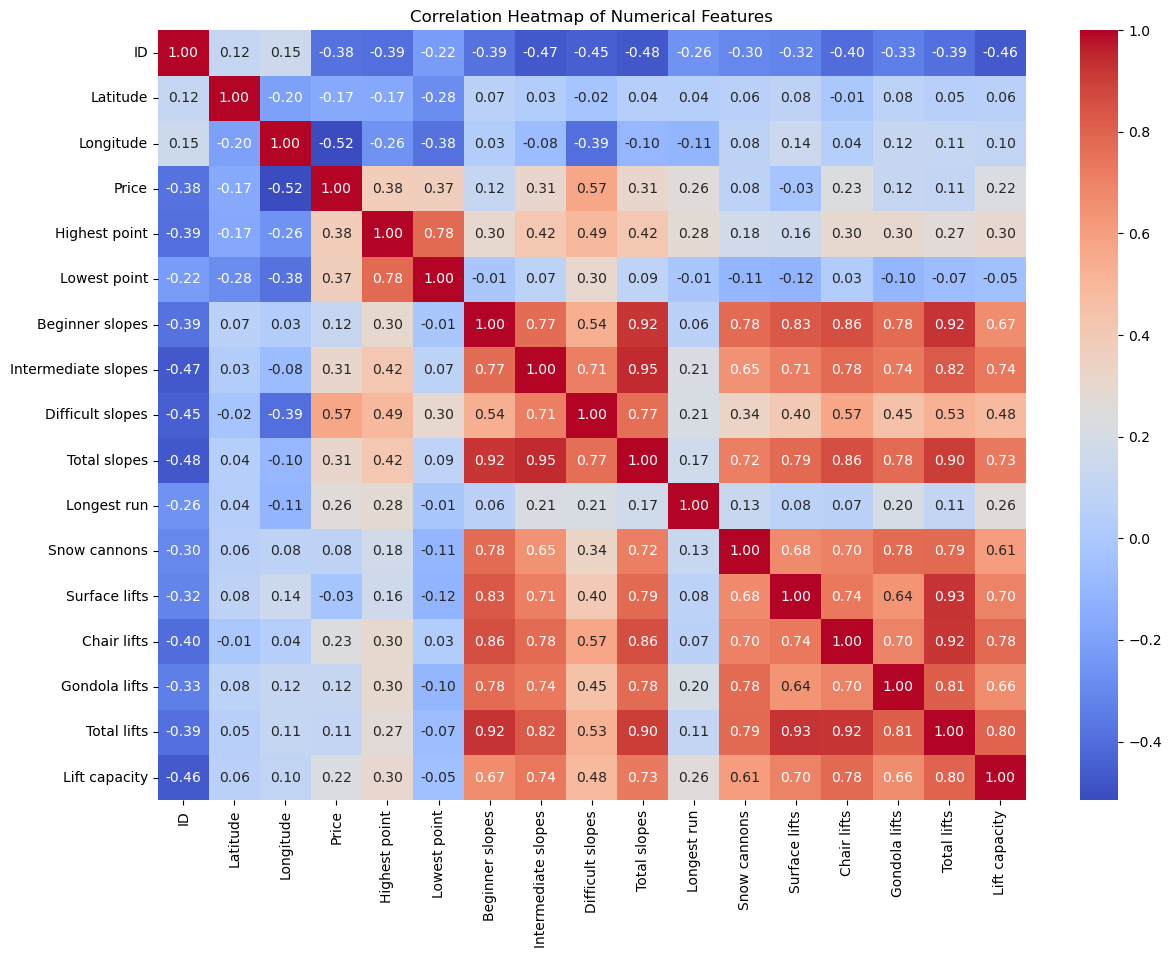

In [10]:
# 1. Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = resorts_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


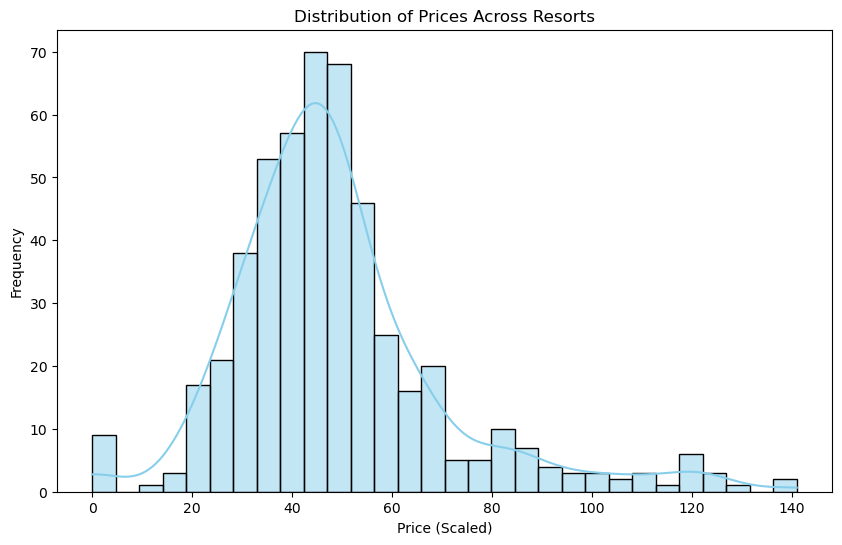

In [11]:
# 2. Distribution Plot of Prices Across Resorts
plt.figure(figsize=(10, 6))
sns.histplot(resorts_df['Price'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Prices Across Resorts')
plt.xlabel('Price (Scaled)')
plt.ylabel('Frequency')
plt.show()


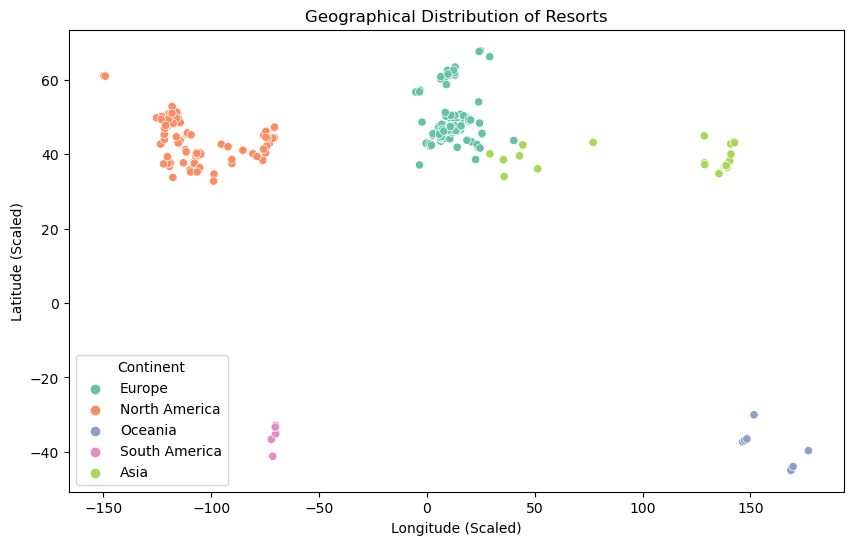

In [12]:
# 3. Scatter Plot of Latitude vs. Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=resorts_df, hue='Continent', palette='Set2')
plt.title('Geographical Distribution of Resorts')
plt.xlabel('Longitude (Scaled)')
plt.ylabel('Latitude (Scaled)')
plt.show()

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'D:/Studies/BDAT/Semester 2/Social Data Mining/Final/Dataset/resorts.csv'
resorts_df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Prepare features (X) and target (y)
X = resorts_df.drop(columns=['Price'])  # Features excluding the target
y = resorts_df['Beginner slopes']  # Target variable

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Apply forward feature selection
selector = SelectKBest(score_func=f_regression, k='all')  # k='all' to score all features
X_new = selector.fit_transform(X, y)

# Get selected feature scores and p-values
scores = selector.scores_
pvalues = selector.pvalues_

# Create a DataFrame to see the results
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'p-Value': pvalues})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Display feature importance and make the decision on which to keep/remove
print(feature_scores)

# Identify features with lower scores
low_score_features = ['Chair lifts', 'Gondola lifts', 'Total lifts', 'Lift capacity']

# Selecting the final features based on the analysis
X_final = X.drop(columns=low_score_features)

# Display the first few rows of the final dataset
print(X_final.head())

                                               Feature         Score  \
15                                       Lift capacity  3.188571e+03   
14                                         Total lifts  2.889804e+03   
8                                         Total slopes  2.653371e+03   
12                                         Chair lifts  1.408317e+03   
11                                       Surface lifts  1.122261e+03   
..                                                 ...           ...   
222  Resort_Kleine Scheidegg / ?Ma?nnlichen-Grindel...  6.200679e-04   
337           Resort_Pal-?Arinsal-La Massana-Vallnord-  2.989889e-04   
394                                    Resort_Savognin  1.447749e-05   
39                                       Resort_Arabba  1.447749e-05   
5                                      Beginner slopes -1.119145e+18   

           p-Value  
15   2.254224e-218  
14   3.017117e-209  
8    1.960426e-201  
12   3.904351e-147  
11   1.452493e-129  
..       

In [12]:
# This dataset doesn't have the required data (Textual Data) to perform Sentimental Analysis

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = resorts_df.drop(columns=['Price'])  # Features
y = resorts_df['Beginner slopes']  # Target variable

# Convert categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)

# Train models
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_reg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output results
{
    "Linear Regression": {"MSE": mse_lr, "R2": r2_lr},
    "Random Forest": {"MSE": mse_rf, "R2": r2_rf}
}


{'Linear Regression': {'MSE': 2.352819881237781e-08, 'R2': 0.9999999999921475},
 'Random Forest': {'MSE': 1.3282499999999997, 'R2': 0.9995567014180048}}

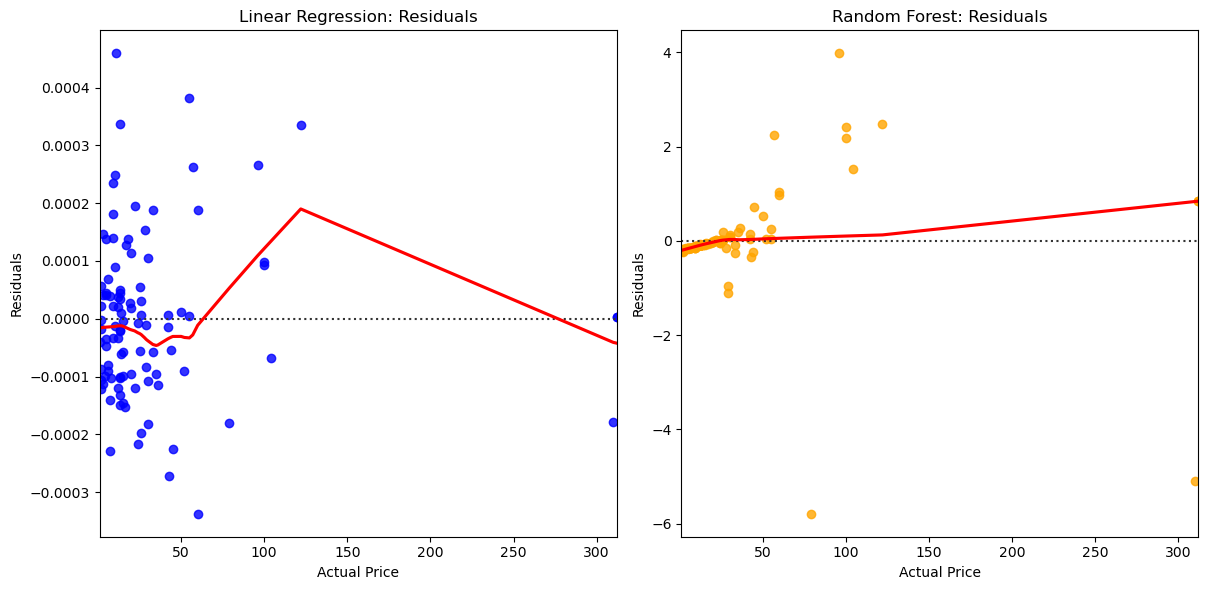

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Residual Plot: Linear Regression
plt.subplot(1, 3, 1)
sns.residplot(x=y_test, y=y_pred_lr, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Linear Regression: Residuals')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')

# Residual Plot: Random Forest
plt.subplot(1, 3, 2)
sns.residplot(x=y_test, y=y_pred_rf, lowess=True, color='orange', line_kws={'color': 'red'})
plt.title('Random Forest: Residuals')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


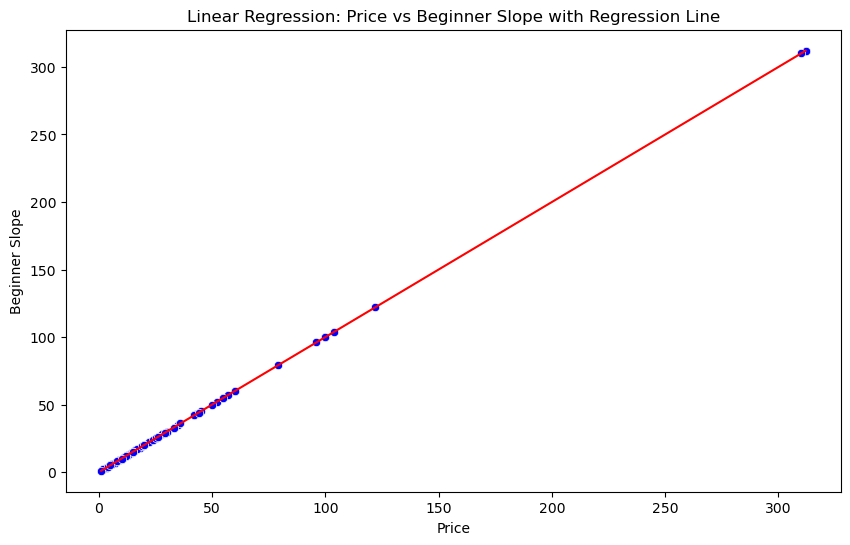

In [18]:
# Prepare features (X) and target (y)
X = resorts_df.drop(columns=['Price'])  # Features excluding the target
y = resorts_df['Beginner slopes']  # Target variable

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Get predicted values for the test set
y_pred_lr = linear_reg.predict(X_test)

# Plot the regression line with actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', edgecolor='white')
sns.lineplot(x=y_test, y=y_test, color='red')  # Plotting the ideal regression line
plt.title('Linear Regression: Price vs Beginner Slope with Regression Line')
plt.xlabel('Price')
plt.ylabel('Beginner Slope')
plt.show()